<a href="https://colab.research.google.com/github/saifulrijal-ds/image-classification-with-DL/blob/main/Pretrained_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import backend

import os

## Constants

In [2]:
directory = ('/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images')

# filenames = []
files_dict = {}
for filename in os.listdir(directory):
  if filename.endswith('.jpg'):
    # print(filename.split())
    path = os.path.join(directory, filename)
    files_dict["file_{}".format(filename.split()[0])] = path
    # filenames.append(path)
  else:
    continue

# filenames
files_dict

{'file_01': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/01 Umbrella.jpg',
 'file_02': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/02 Couple.jpg',
 'file_03': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/03 Ocean.jpg',
 'file_04': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/04 Horse.jpg',
 'file_05': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/05 City.jpg',
 'file_06': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/06 Feet.jpg',
 'file_07': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/07 Stairs.jpg',
 'file_08': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classifica

In [3]:
FILE_1 = files_dict['file_01']
FILE_2 = files_dict['file_02']
FILE_3 = files_dict['file_03']

## Preprocessing Images

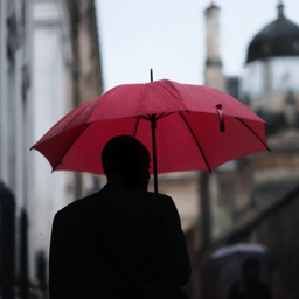

In [4]:
# load image to defualt image size for InceptionResNetV2
pic = load_img(FILE_1, target_size=(299, 299))
display(pic)

In [5]:
  pic_array = img_to_array(pic)
  pic_array.shape

(299, 299, 3)

Hasil pic_array.shape yaitu (256, 256, 3) dapat diinterpretasikan 256 baris, 256 kolom (resolusi gambar setelah dikompres oleh mesin), dan 3 'channel' atau mewakili 3 warna RGB.

In [7]:
X = np.expand_dims(pic_array, axis=0)
print(X.shape)
X = preprocess_input(X)

(1, 299, 299, 3)


Melewatkan proses preprocess_input dapat menyebabkan kesalahan prediksi. Diperlukan expand dimensi untuk menyesuaikan dimensi input model.

**Challange:** Create a function called ```format_image_inceptionresnet()``` that takes filename as an argument. The function needs to load the image in default resolution for InceptionResNetV2, convert the image to an array, and than preprocessed image for the InceptionResNetV2 model.

In [13]:
def format_image_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299, 299))
  pic_array = img_to_array(pic)
  X = np.expand_dims(pic_array, axis=0)
  return preprocess_input(X)

## Load InceptionResNet

Keras Application merupakan model deep learning, dengan bobot terlatih, yang tersedia di dalam package Keras, selebihnya [Keras Application](https://keras.io/api/applications/). 'imagenet' merupakan bobot yang digunakan untuk pre-trained model berdasarkan database di [IMAGENET](http://www.image-net.org/).

In [8]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 5.25 s, sys: 249 ms, total: 5.5 s
Wall time: 5.21 s


In [9]:
# inception_model.graph = tf.get_default_graph()
# inception_model.graph = tf.compat.v1.get_default_graph()
inception_model.graph = tf.Graph().as_default()

## Making Prediction

In [11]:
pred = inception_model.predict(X)
decode_predictions(pred)

[[('n04507155', 'umbrella', 0.82924366),
  ('n03792972', 'mountain_tent', 0.0012268272),
  ('n04479046', 'trench_coat', 0.0011062957),
  ('n03788195', 'mosque', 0.0010572362),
  ('n03220513', 'dome', 0.0010310998)]]

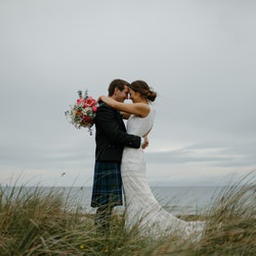

[[('n10148035', 'groom', 0.7042396),
  ('n03450230', 'gown', 0.11669533),
  ('n11879895', 'rapeseed', 0.016582564),
  ('n09421951', 'sandbar', 0.012790607),
  ('n03534580', 'hoopskirt', 0.007287771)]]

In [15]:
data = format_image_inceptionresnet(FILE_2)
pred = inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(pred)